# Feature Effect Evaluation

<script>
    document.querySelector('head').innerHTML += '<style>.slides { zoom: 0.975 !important; }</style>';
</script>

<style>
/* Ensure the entire cell and its output take full width */
.reveal .slides > section .cell {
    width: 90% !important;
    margin: 0 auto;
}

.reveal .slides > section .output {
    width: 90% !important;
    max-width: 90% !important;
    height: 90% !important;
    max-height: 90% !important;
    margin: 0 auto;
}

/* Optional: Adjust the slide width if necessary */
.reveal .slides {
    width: 90% !important;
    max-width: 90% !important;
    height: 90% !important;
    max-height: 90% !important;
}


</style>

In [6]:
config_file = "../../config_sim_simple_scenarios_20.ini"

# set up of example
sim_no = 1
n_train = 1000
snr = 10
groundtruth_effect = "empirical"

In [7]:
from configparser import ConfigParser
from joblib import load
import pandas as pd
from IPython.display import Markdown as md

from feature_effect_empirical_analysis.plotting.plots import boxplot_feature_effect_results, plot_effect_comparison
from feature_effect_empirical_analysis.data_generating.data_generation import generate_data

In [8]:
config = ConfigParser()
config.read(config_file)

['../../config_sim_simple_scenarios_20.ini']

## PDP

### Error of Model-PD compared to groundtruth-PD

In [9]:
effects_results_storage = config.get("storage", "effects_results")
df = pd.read_sql_table("pdp_results", f"sqlite:///..{effects_results_storage}")
df

,index,model_id,model,simulation,n_train,snr,metric,x_1,x_2,x_3,x_4
0,0,XGBoost-2comb-cor_1_1000_10,XGBoost-2comb-cor,1,1000,10.0,mean_squared_error,15.821549,2.325156,9.639787e-04,7.389586e-02
1,0,XGBoost-full_1_1000_10,XGBoost-full,1,1000,10.0,mean_squared_error,19.526100,4.374408,4.502286e-03,5.171138e-02
2,0,SVM-RBF_1_1000_10,SVM-RBF,1,1000,10.0,mean_squared_error,0.580659,0.291071,1.272251e-03,7.229931e-04
3,0,GAM-2comb-cor_1_1000_10,GAM-2comb-cor,1,1000,10.0,mean_squared_error,0.015125,0.071369,3.591317e-08,3.591317e-08
4,0,GAM-4-full_1_1000_10,GAM-4-full,1,1000,10.0,mean_squared_error,0.087760,0.105545,2.604493e-03,6.769436e-03
...,...,...,...,...,...,...,...,...,...,...,...
134,0,GAM-4-full_14_1000_10,GAM-4-full,14,1000,10.0,mean_squared_error,0.027707,0.039373,2.870496e-03,1.991125e-03
135,0,XGBoost-2comb-cor_14_1000_5,XGBoost-2comb-cor,14,1000,5.0,mean_squared_error,3.729948,2.145264,3.478773e-02,1.431223e-02
136,0,XGBoost-full_14_1000_5,XGBoost-full,14,1000,5.0,mean_squared_error,4.780519,3.204406,6.331317e-03,2.786145e-03
137,0,SVM-RBF_14_1000_5,SVM-RBF,14,1000,5.0,mean_squared_error,0.560779,0.452338,2.741608e-03,8.657312e-04


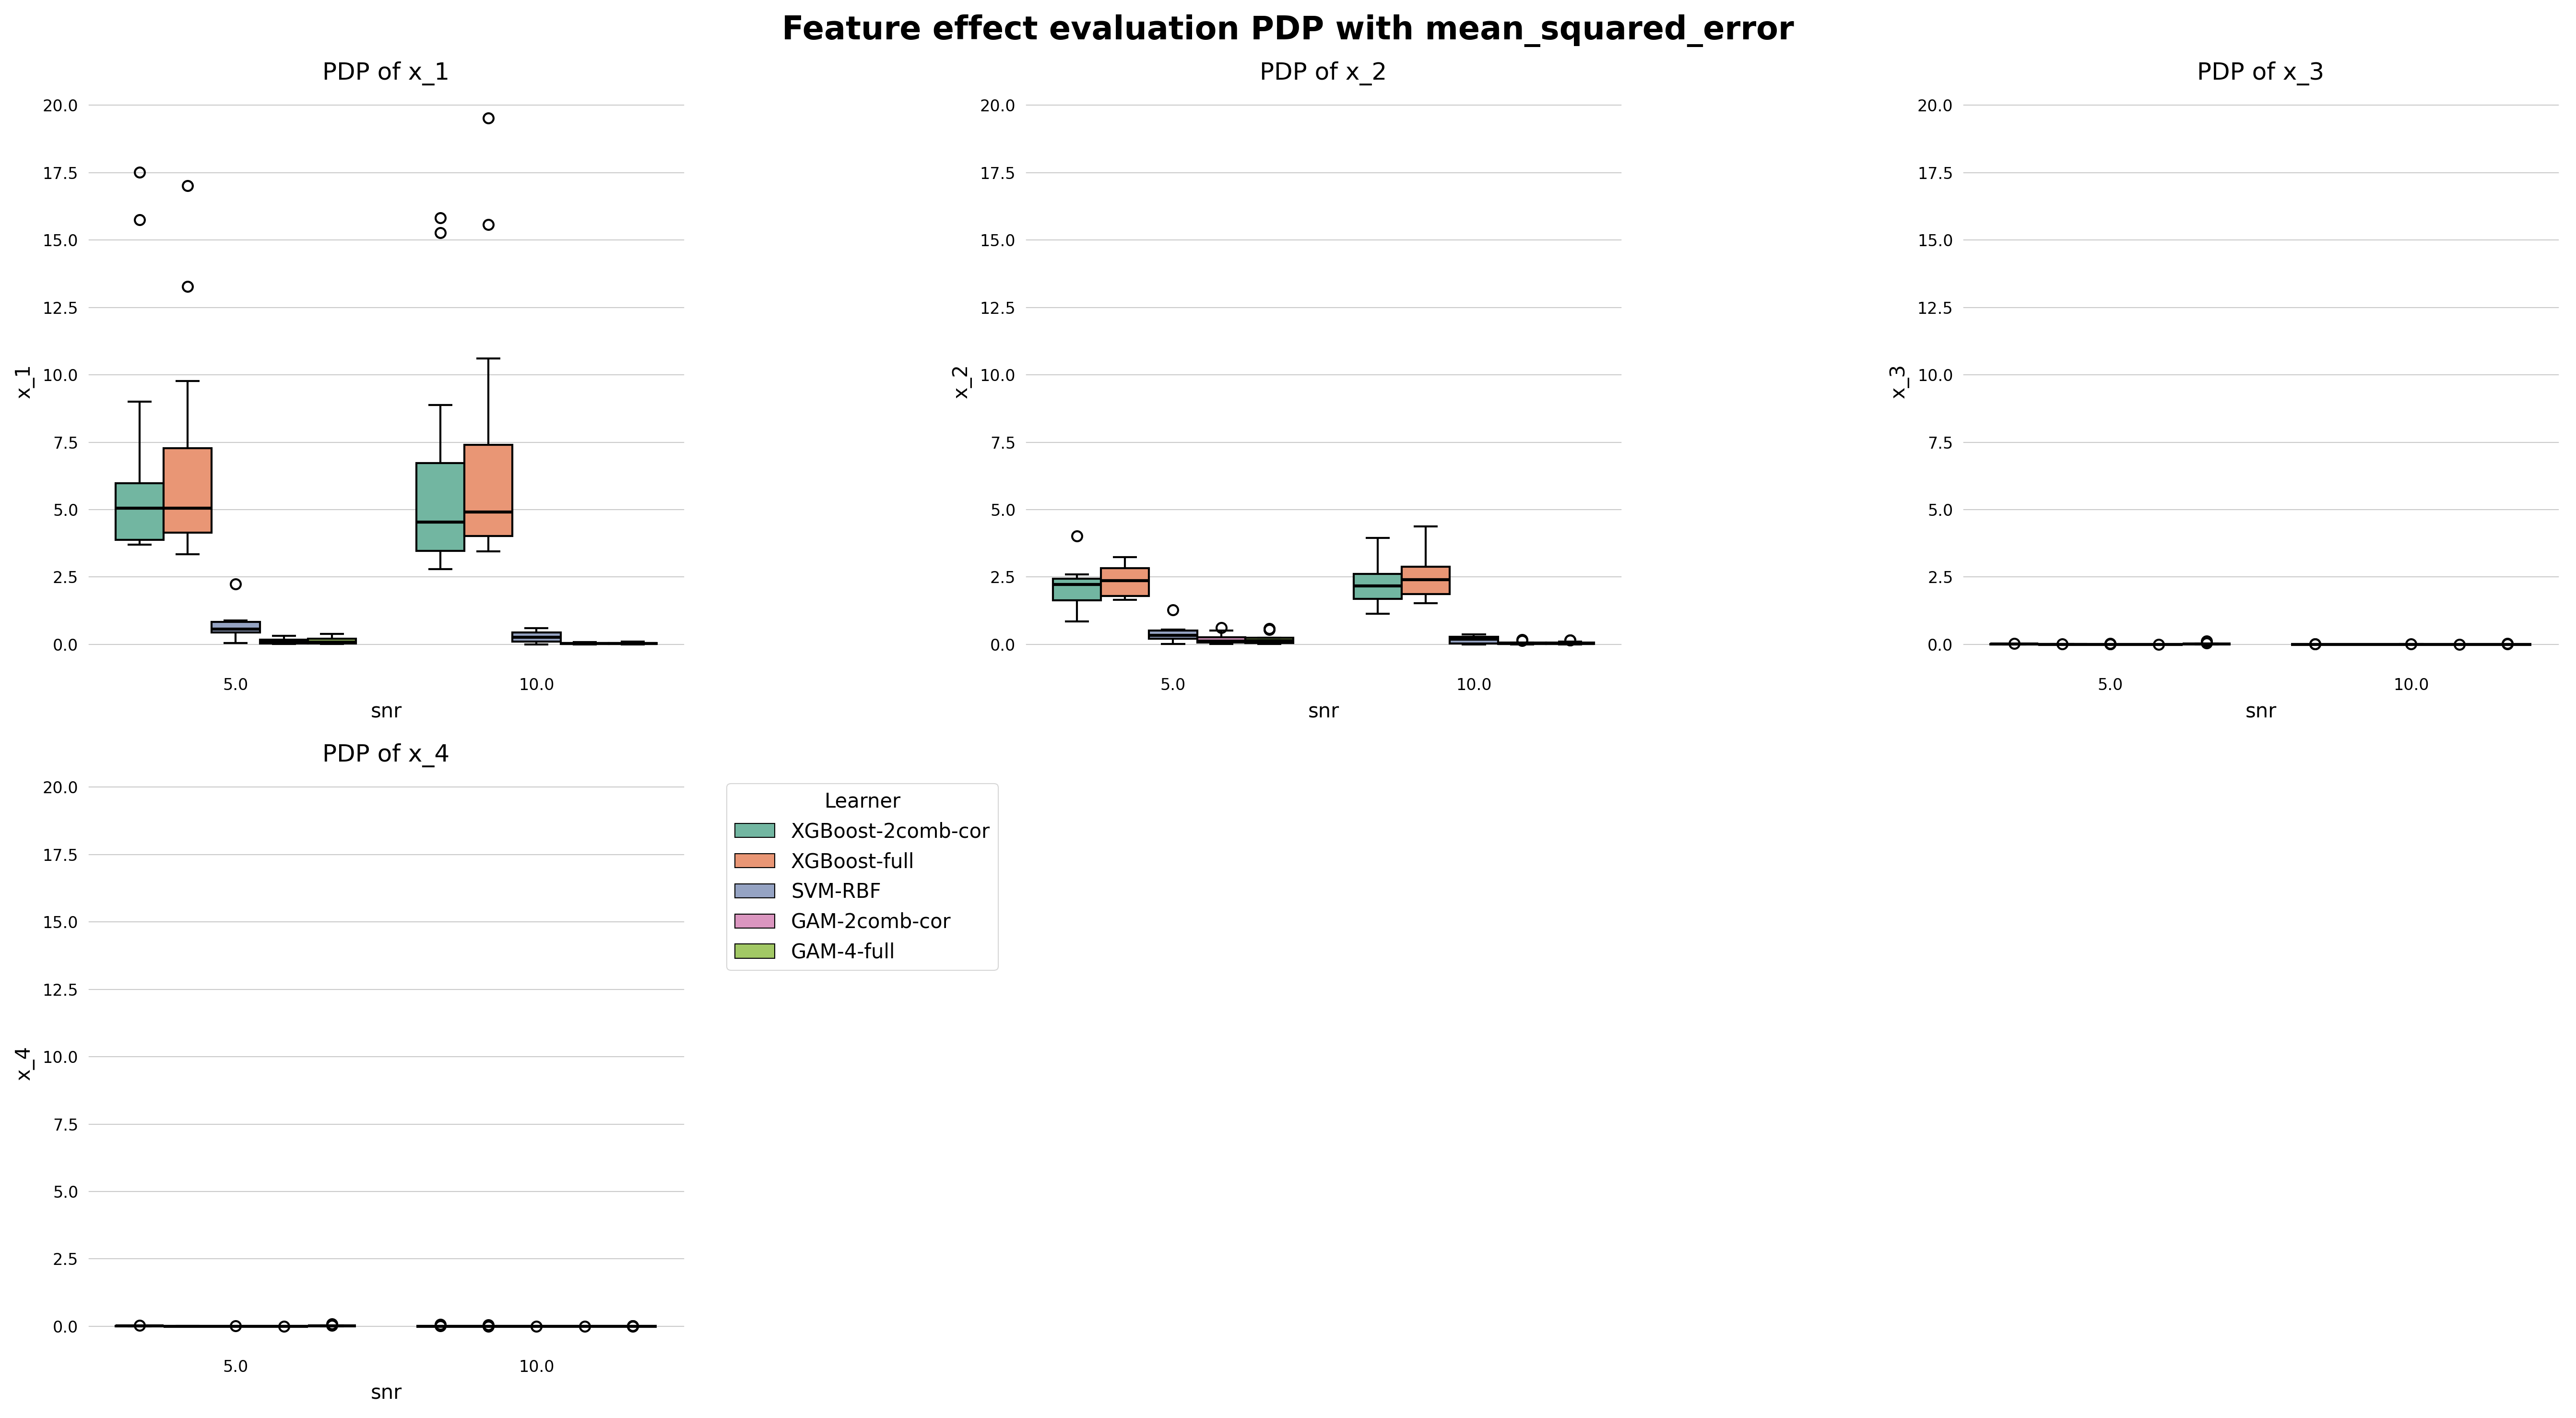

In [10]:
%matplotlib inline
boxplot_feature_effect_results(features=["x_1", "x_2", "x_3", "x_4"], df=df, effect_type="PDP");

### PDP example visualizations

In [11]:
md(f"(simulation no. {sim_no} with n_train={n_train} and snr={snr})")

(simulation no. 1 with n_train=1000 and snr=10)

In [12]:
# init groundtruth
groundtruth = load("../groundtruth.joblib")
# recreate dataset
X_train, y_train, X_test, y_test = generate_data(groundtruth, n_train, 1000, snr, seed=1)
# load models
gam_cor = load(f'../models/GAM-2comb-cor_{sim_no}_{n_train}_{snr}.joblib')
gam_full = load(f'../models/GAM-4-full_{sim_no}_{n_train}_{snr}.joblib')
xgb_full = load(f'../models/XGBoost-full_{sim_no}_{n_train}_{snr}.joblib')
xgb_cor = load(f'../models/XGBoost-2comb-cor_{sim_no}_{n_train}_{snr}.joblib')
svm = load(f'../models/SVM-RBF_{sim_no}_{n_train}_{snr}.joblib')

c:\Users\ti-he\OneDrive\Dokumente\Projekte\feature-effect-empirical-analysis\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


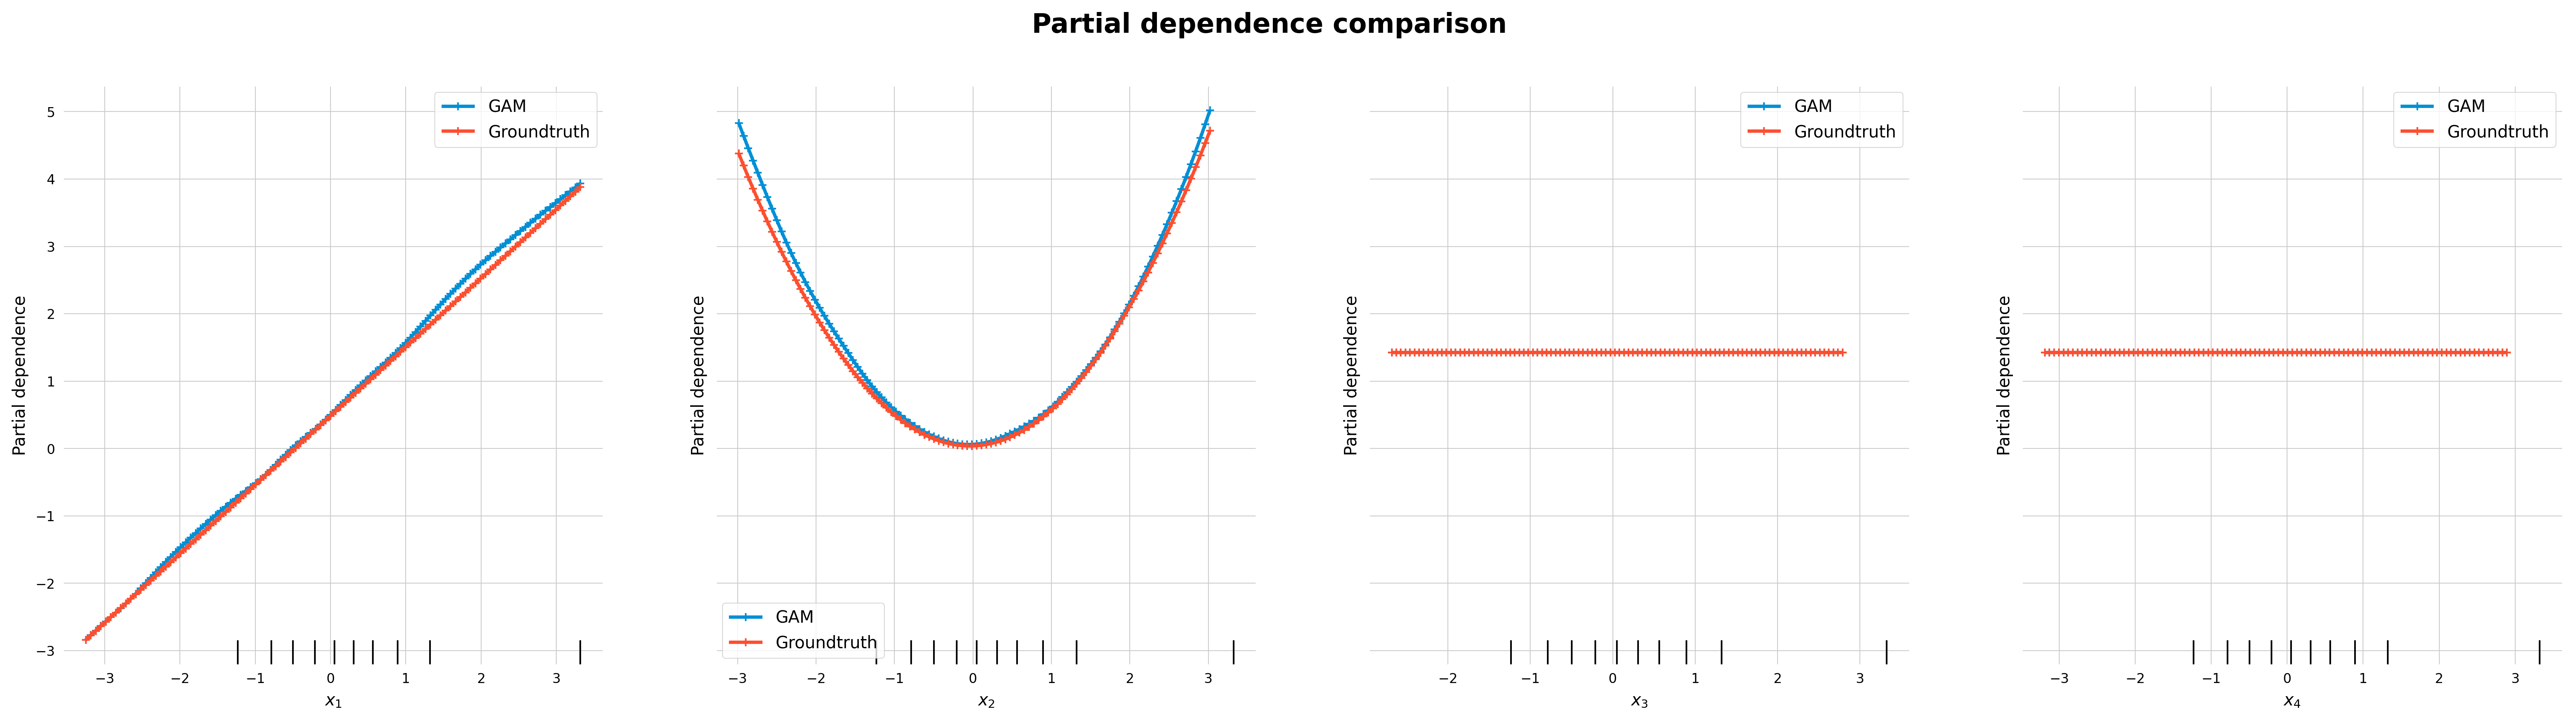

In [13]:
%matplotlib inline
plot_effect_comparison(gam_cor, groundtruth, X_train, effect="PDP", groundtruth_feature_effect=groundtruth_effect, features=['x_1', "x_2", "x_3", "x_4"], config=config);

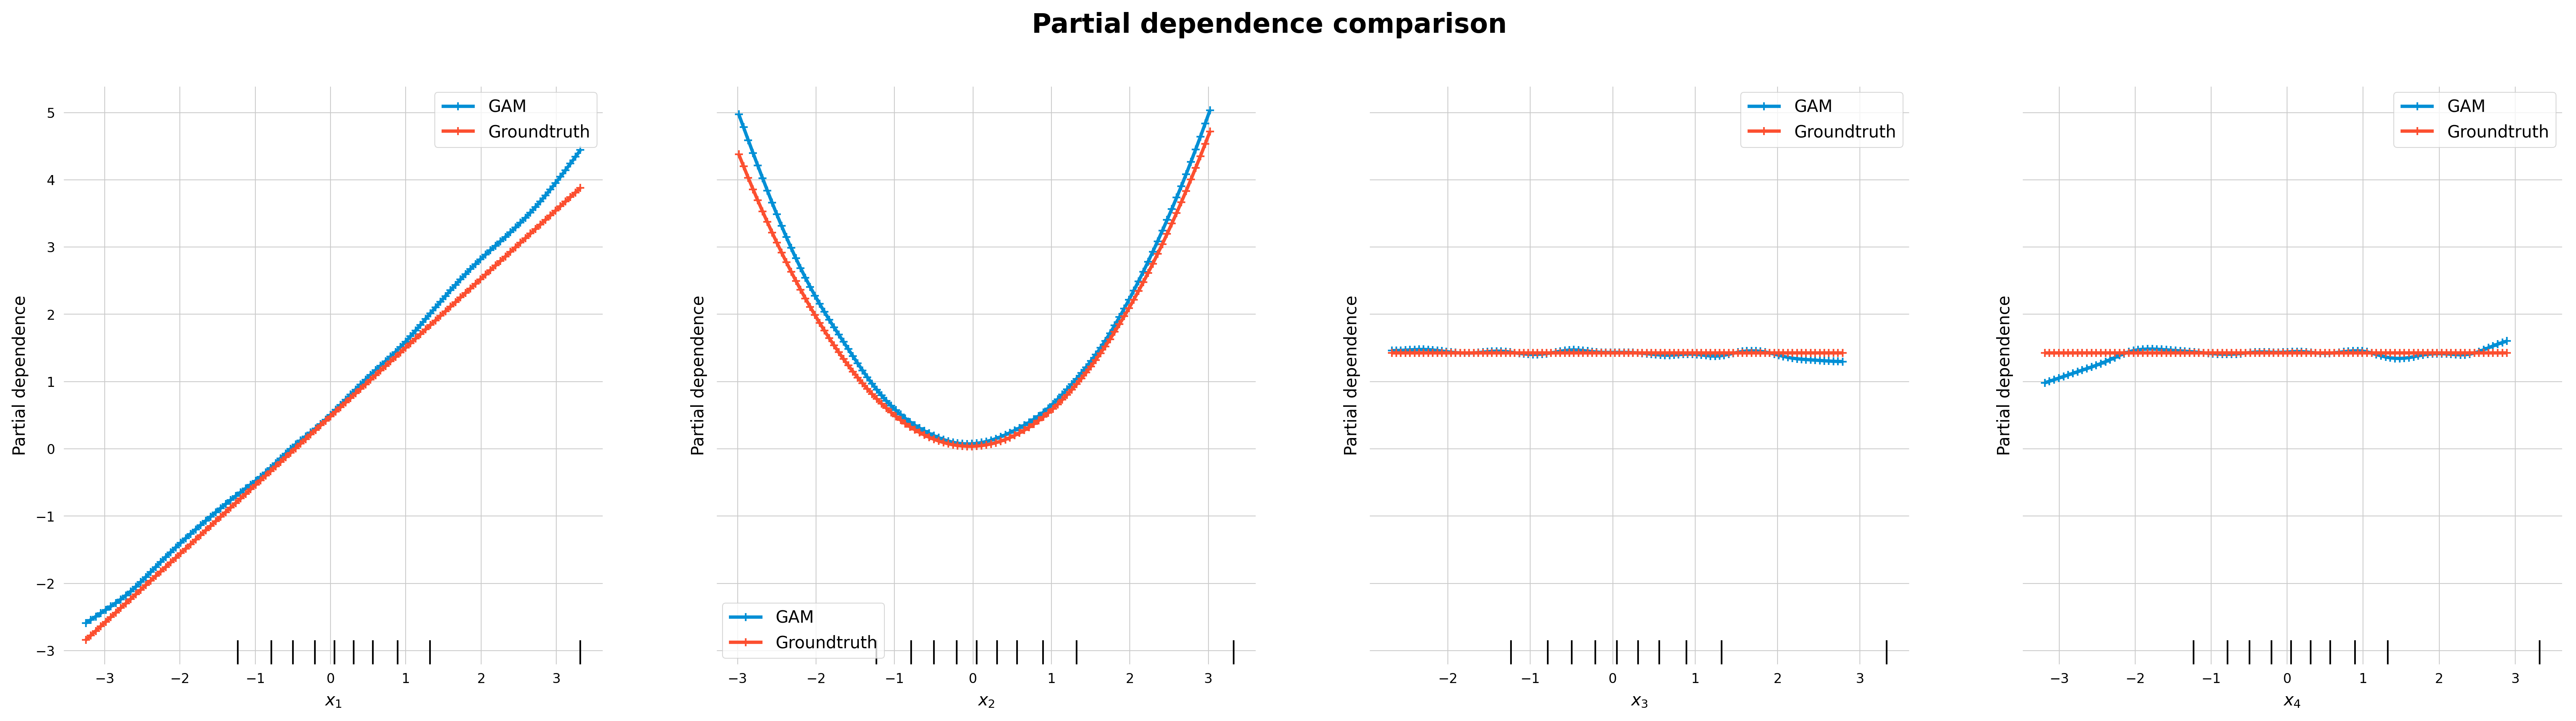

In [14]:
%matplotlib inline
plot_effect_comparison(gam_full, groundtruth, X_train, effect="PDP", groundtruth_feature_effect=groundtruth_effect, features=['x_1', "x_2", "x_3", "x_4"], config=config);

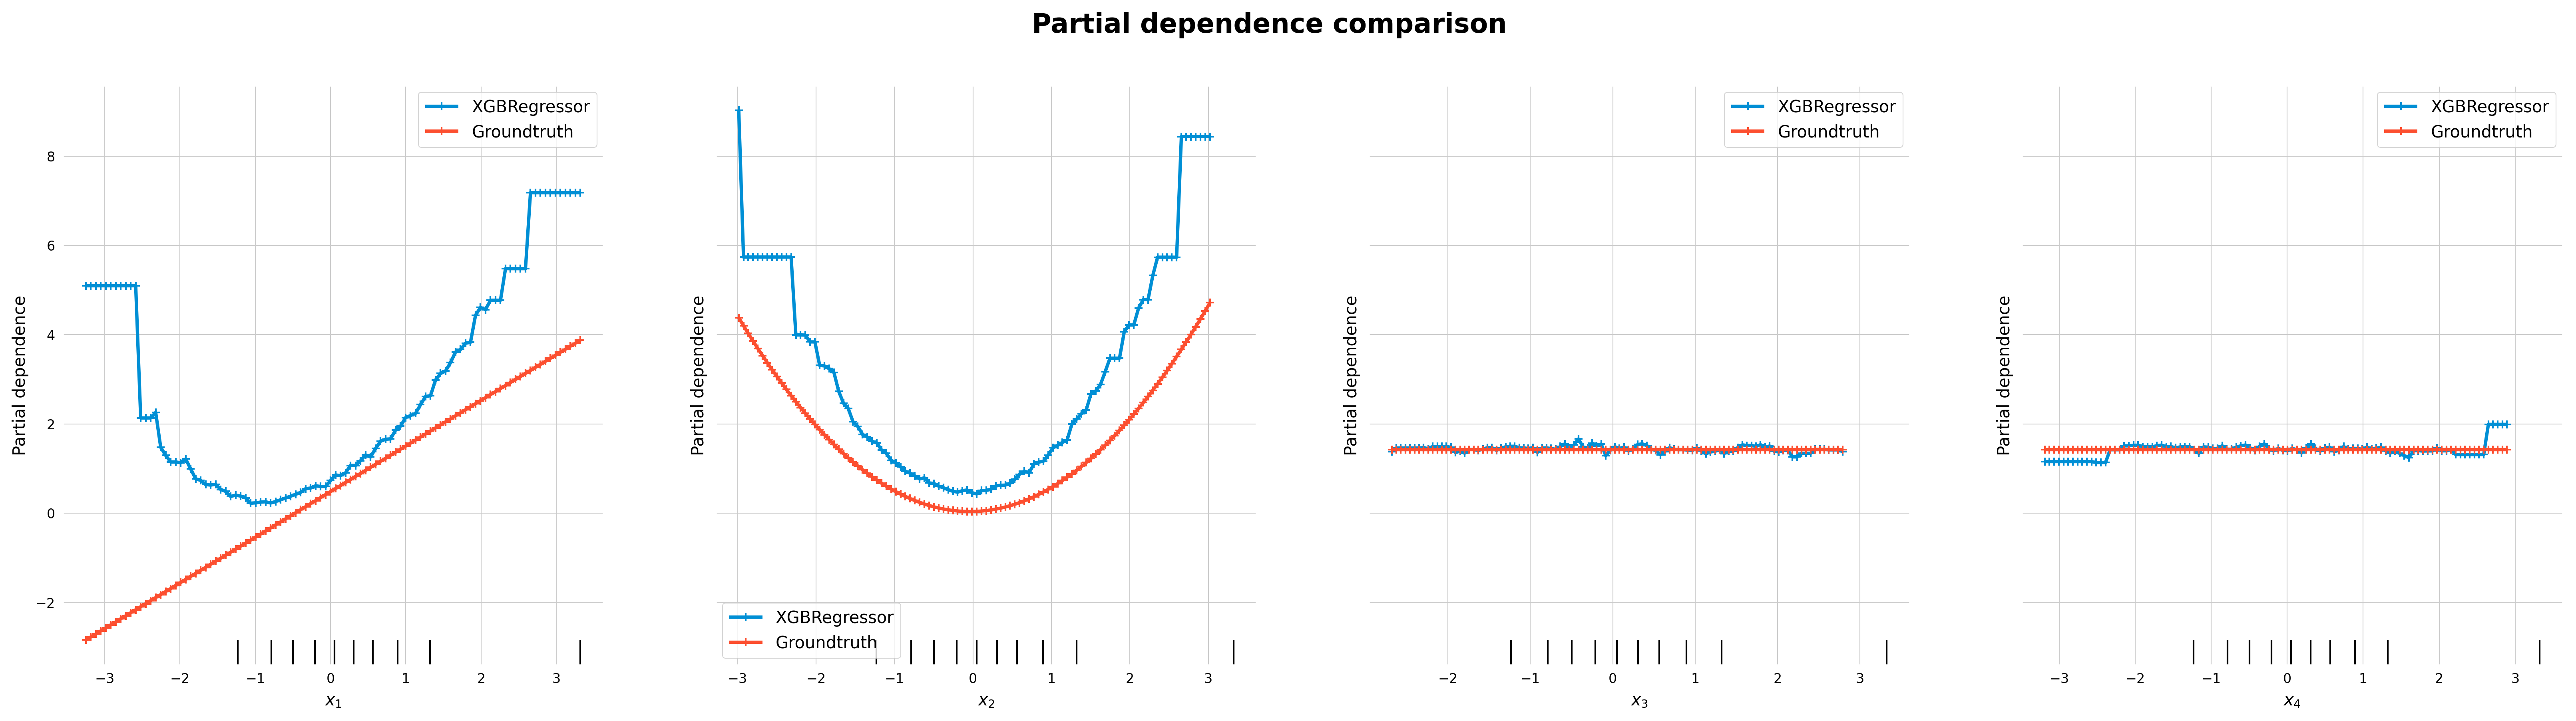

In [15]:
%matplotlib inline
plot_effect_comparison(xgb_full, groundtruth, X_train, effect="PDP", groundtruth_feature_effect=groundtruth_effect, features=['x_1', "x_2", "x_3", "x_4"], config=config);

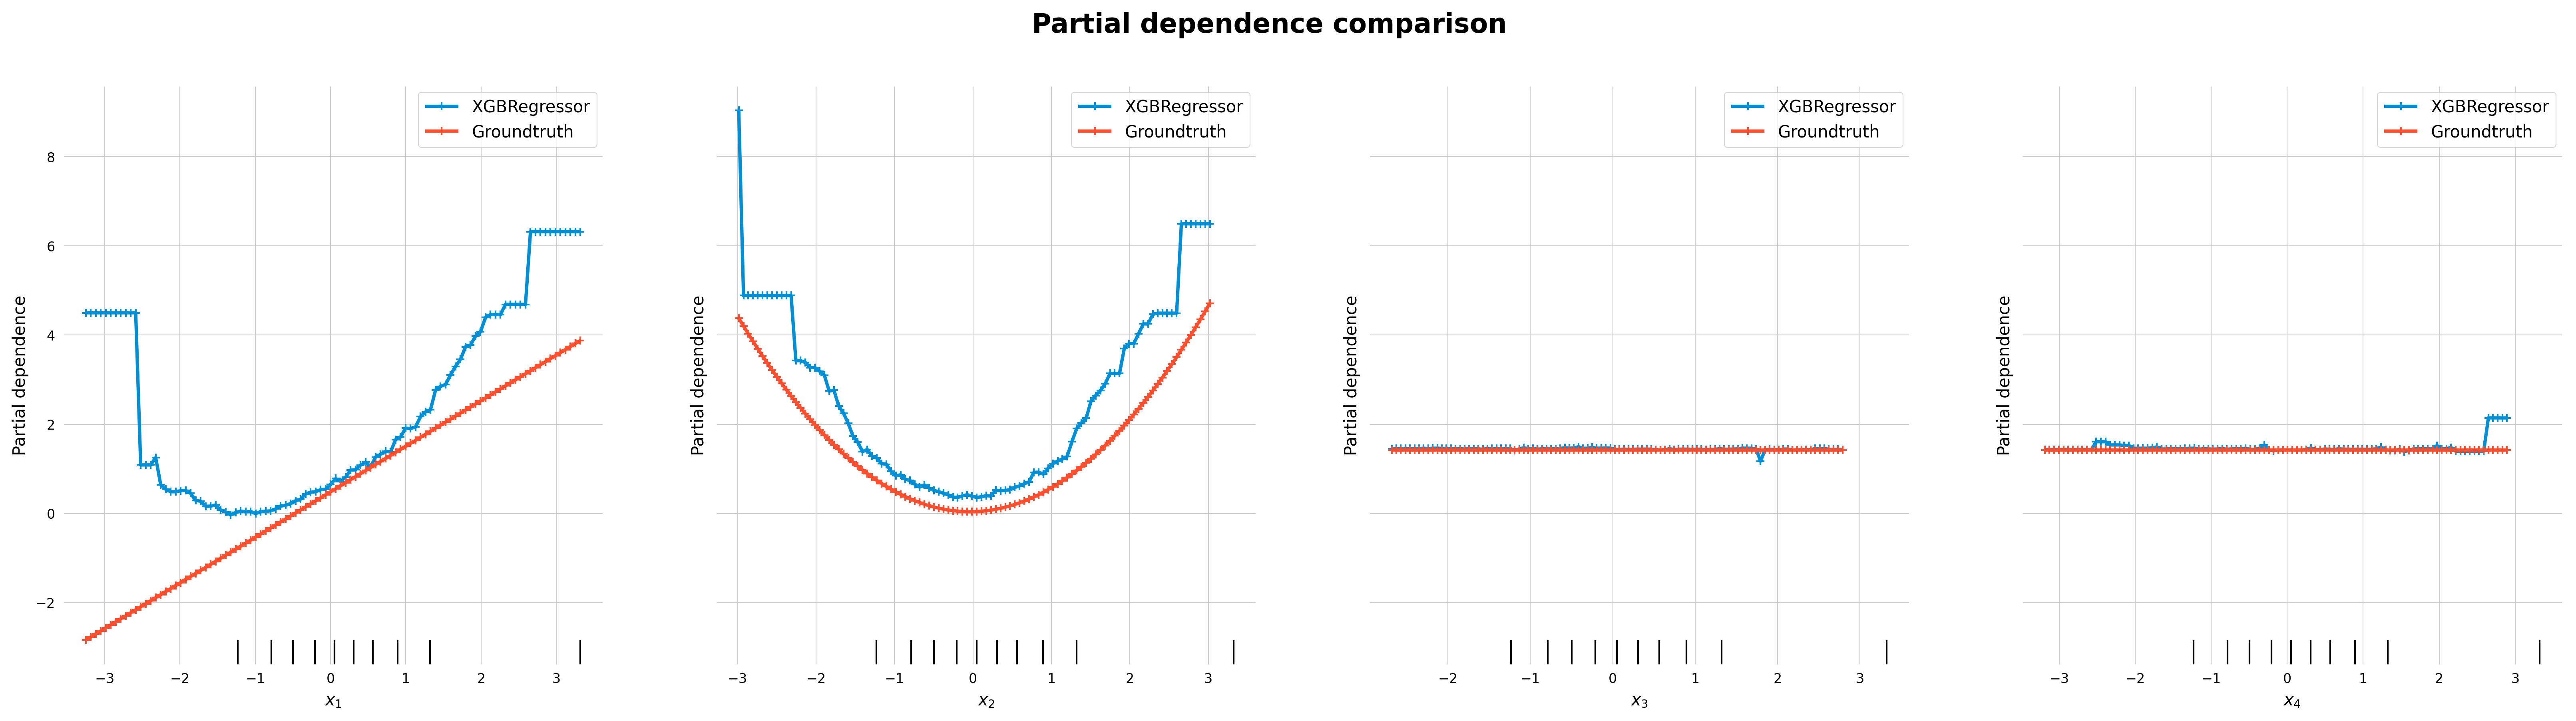

In [16]:
%matplotlib inline
plot_effect_comparison(xgb_cor, groundtruth, X_train, effect="PDP", groundtruth_feature_effect=groundtruth_effect, features=['x_1', "x_2", "x_3", "x_4"], config=config);

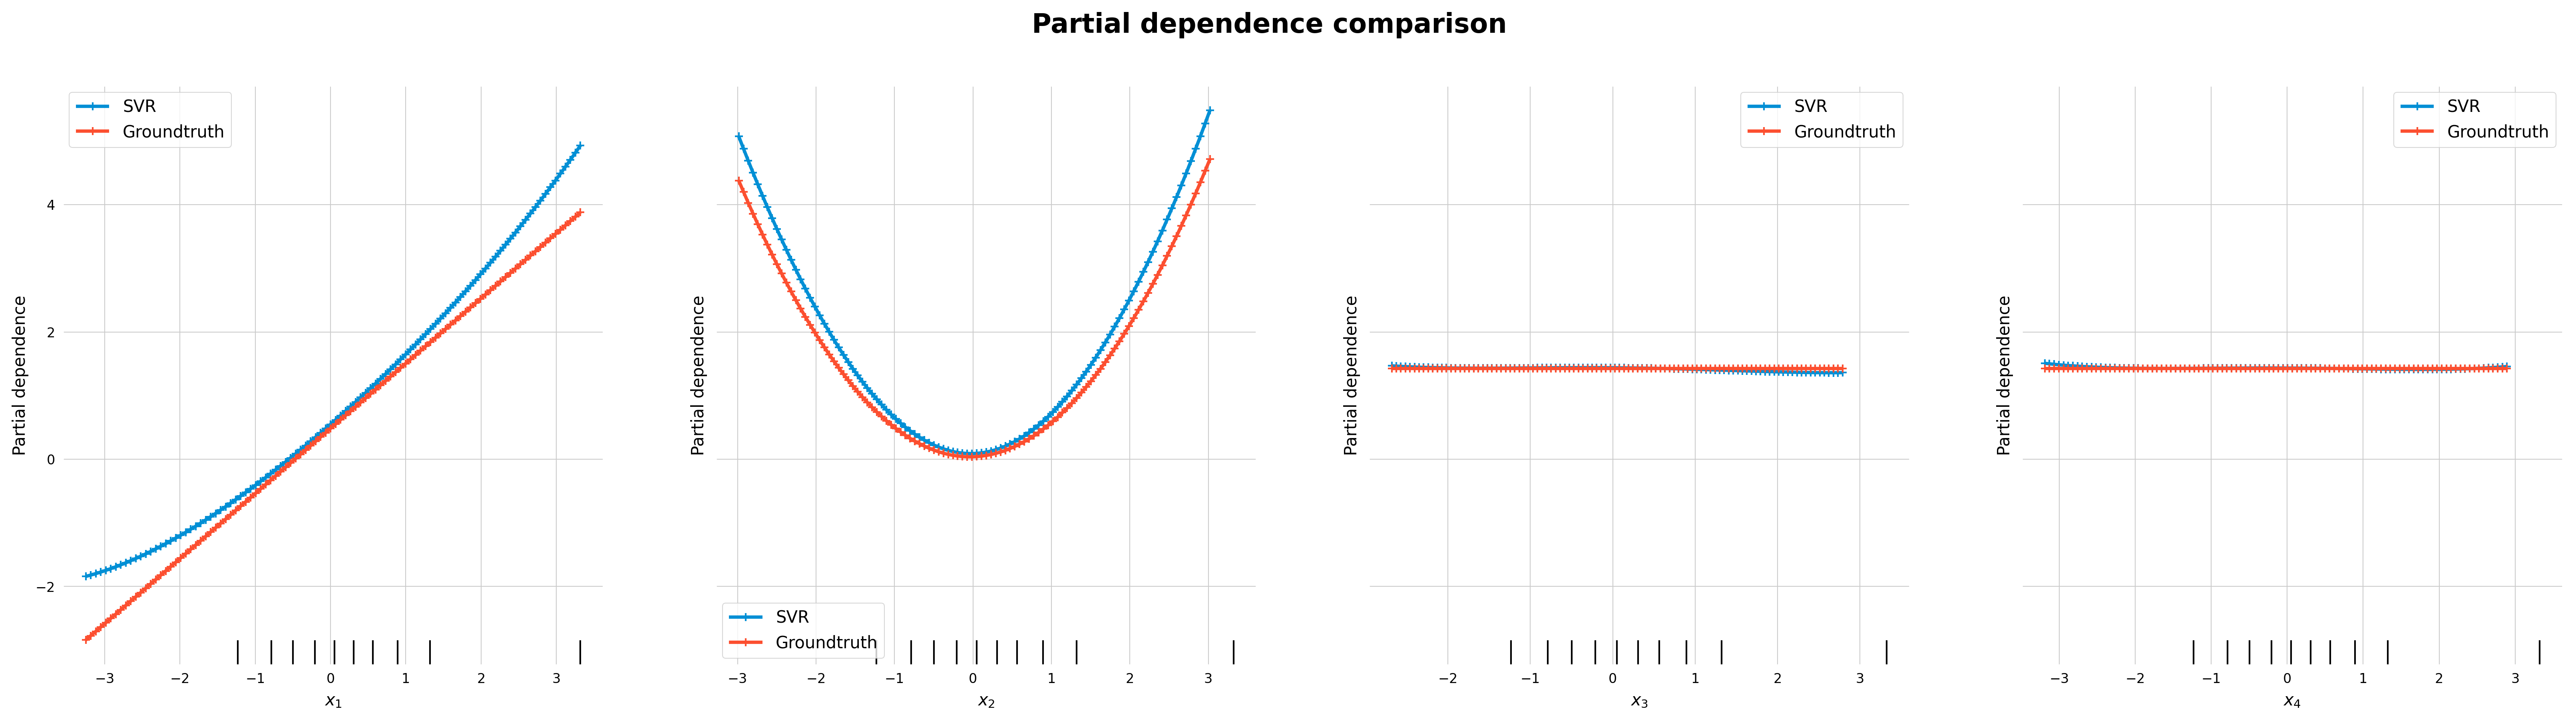

In [17]:
%matplotlib inline
plot_effect_comparison(svm, groundtruth, X_train, effect="PDP", groundtruth_feature_effect=groundtruth_effect, features=['x_1', "x_2", "x_3", "x_4"], config=config);

## ALE

### Error of Model-ALE compared to groundtruth-ALE

In [18]:
effects_results_storage = config.get("storage", "effects_results")
df = pd.read_sql_table("ale_results", f"sqlite:///..{effects_results_storage}")
df

,index,model_id,model,simulation,n_train,snr,metric,x_1,x_2,x_3,x_4
0,0,XGBoost-2comb-cor_1_1000_10,XGBoost-2comb-cor,1,1000,10.0,mean_squared_error,0.019258,0.435218,0.002341,0.005454
1,0,XGBoost-full_1_1000_10,XGBoost-full,1,1000,10.0,mean_squared_error,0.058409,0.594160,0.037520,0.019776
2,0,SVM-RBF_1_1000_10,SVM-RBF,1,1000,10.0,mean_squared_error,0.002655,0.001265,0.000284,0.000152
3,0,GAM-2comb-cor_1_1000_10,GAM-2comb-cor,1,1000,10.0,mean_squared_error,0.001567,0.001622,0.000000,0.000000
4,0,GAM-4-full_1_1000_10,GAM-4-full,1,1000,10.0,mean_squared_error,0.001677,0.000841,0.000858,0.001340
...,...,...,...,...,...,...,...,...,...,...,...
134,0,GAM-4-full_14_1000_10,GAM-4-full,14,1000,10.0,mean_squared_error,0.003500,0.005885,0.001214,0.000697
135,0,XGBoost-2comb-cor_14_1000_5,XGBoost-2comb-cor,14,1000,5.0,mean_squared_error,0.057072,0.118446,0.006527,0.013086
136,0,XGBoost-full_14_1000_5,XGBoost-full,14,1000,5.0,mean_squared_error,0.072528,0.126869,0.003009,0.002848
137,0,SVM-RBF_14_1000_5,SVM-RBF,14,1000,5.0,mean_squared_error,0.005296,0.002288,0.000425,0.000014


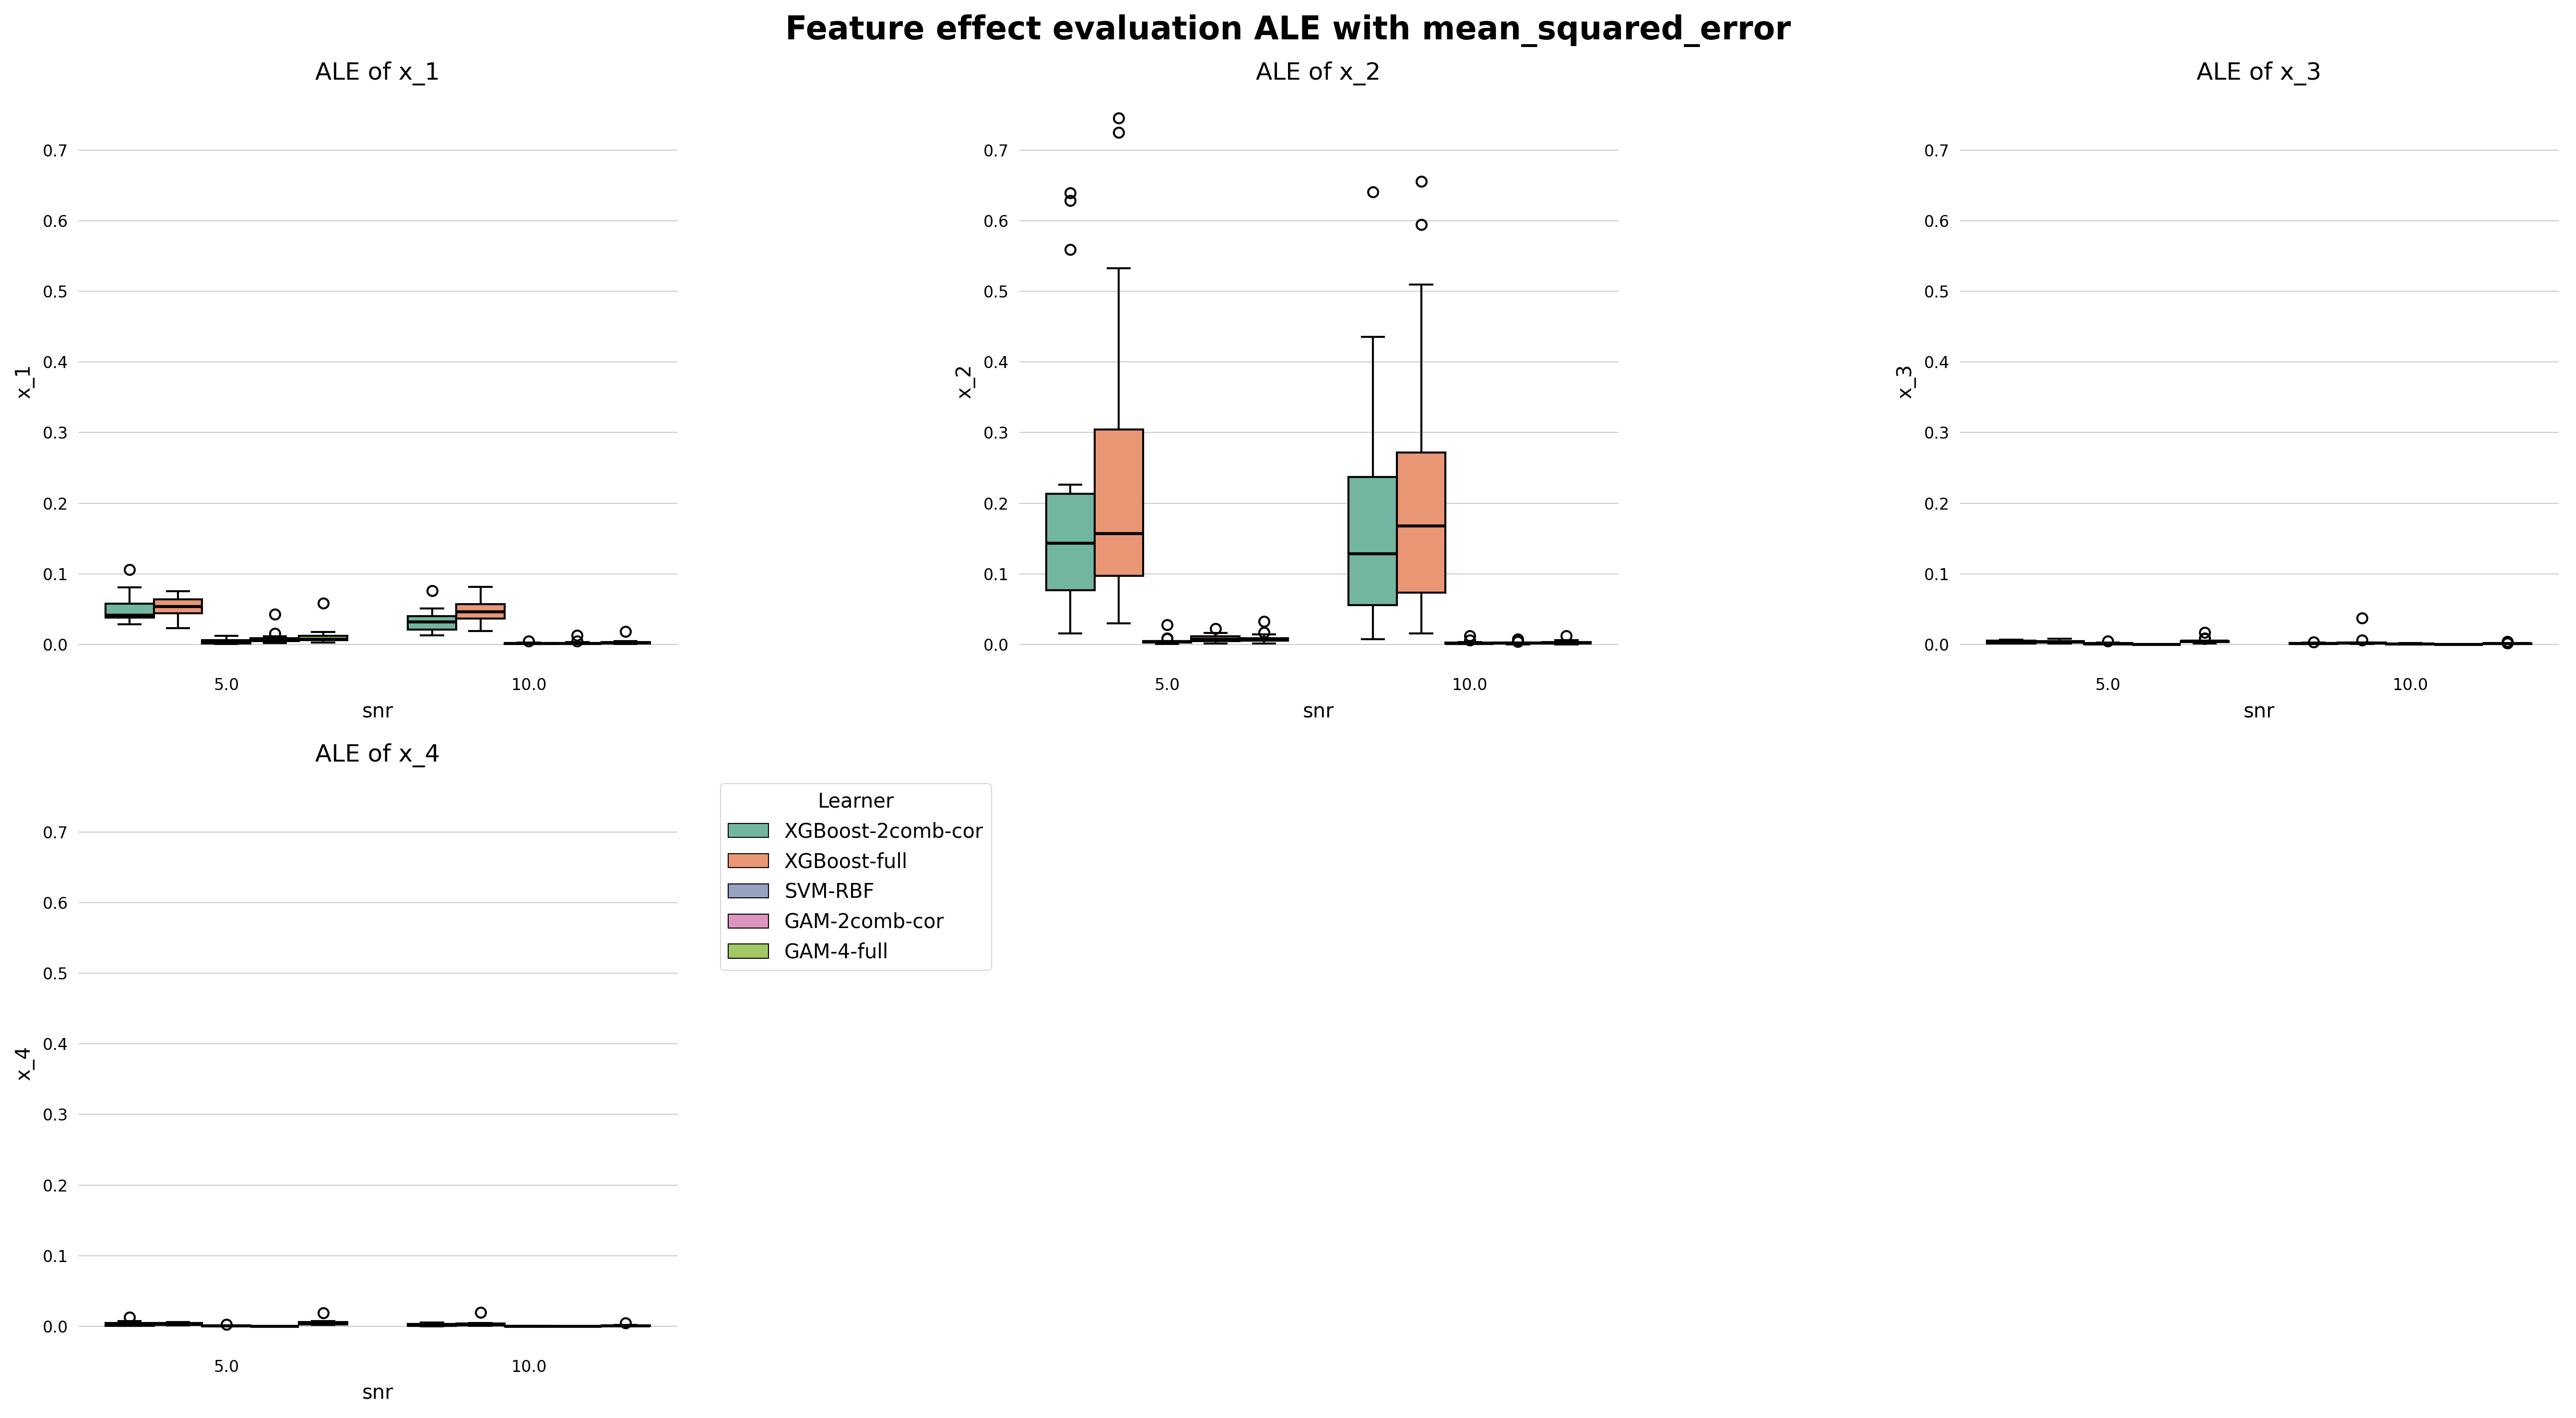

In [19]:
%matplotlib inline
boxplot_feature_effect_results(features=["x_1", "x_2", "x_3", "x_4"], df=df, effect_type="ALE");

### ALE example visualizations

In [20]:
md(f"(simulation no. {sim_no} with n_train={n_train} and noise_sd={snr})")

(simulation no. 1 with n_train=1000 and noise_sd=10)

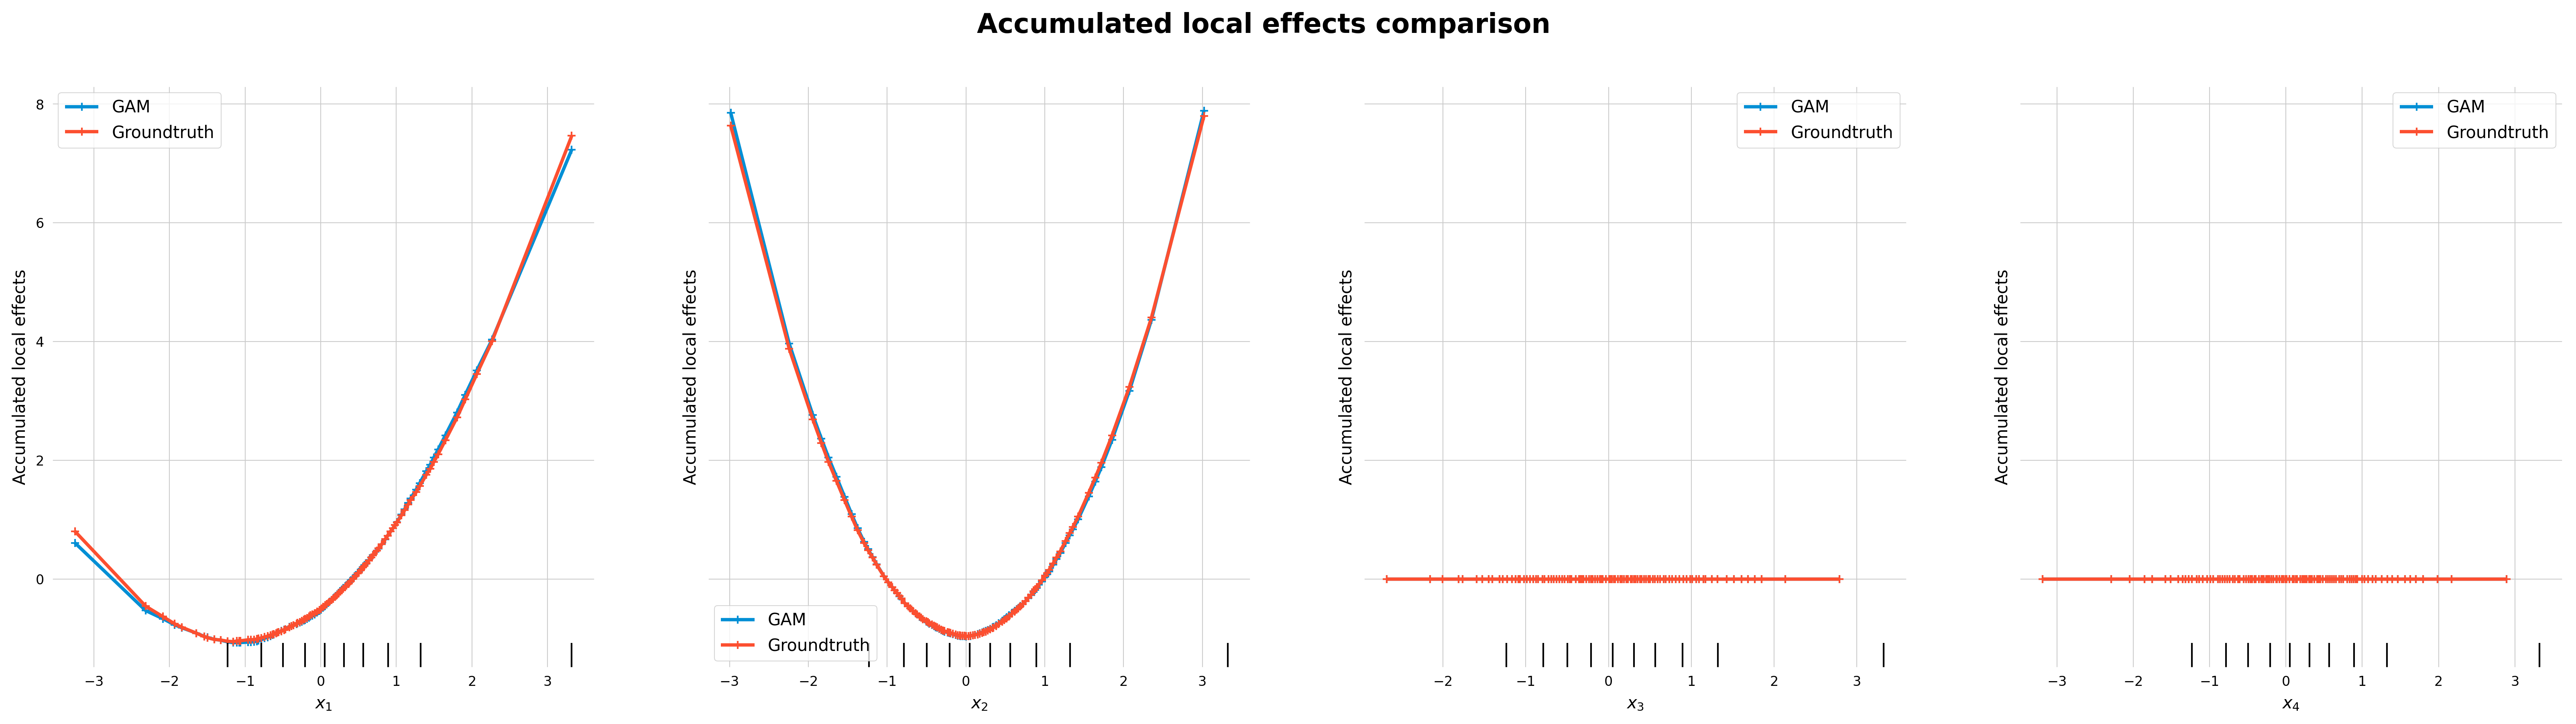

In [21]:
%matplotlib inline
plot_effect_comparison(gam_cor, groundtruth, X_train, effect="ALE", groundtruth_feature_effect=groundtruth_effect, features=['x_1', "x_2", "x_3", "x_4"], config=config);

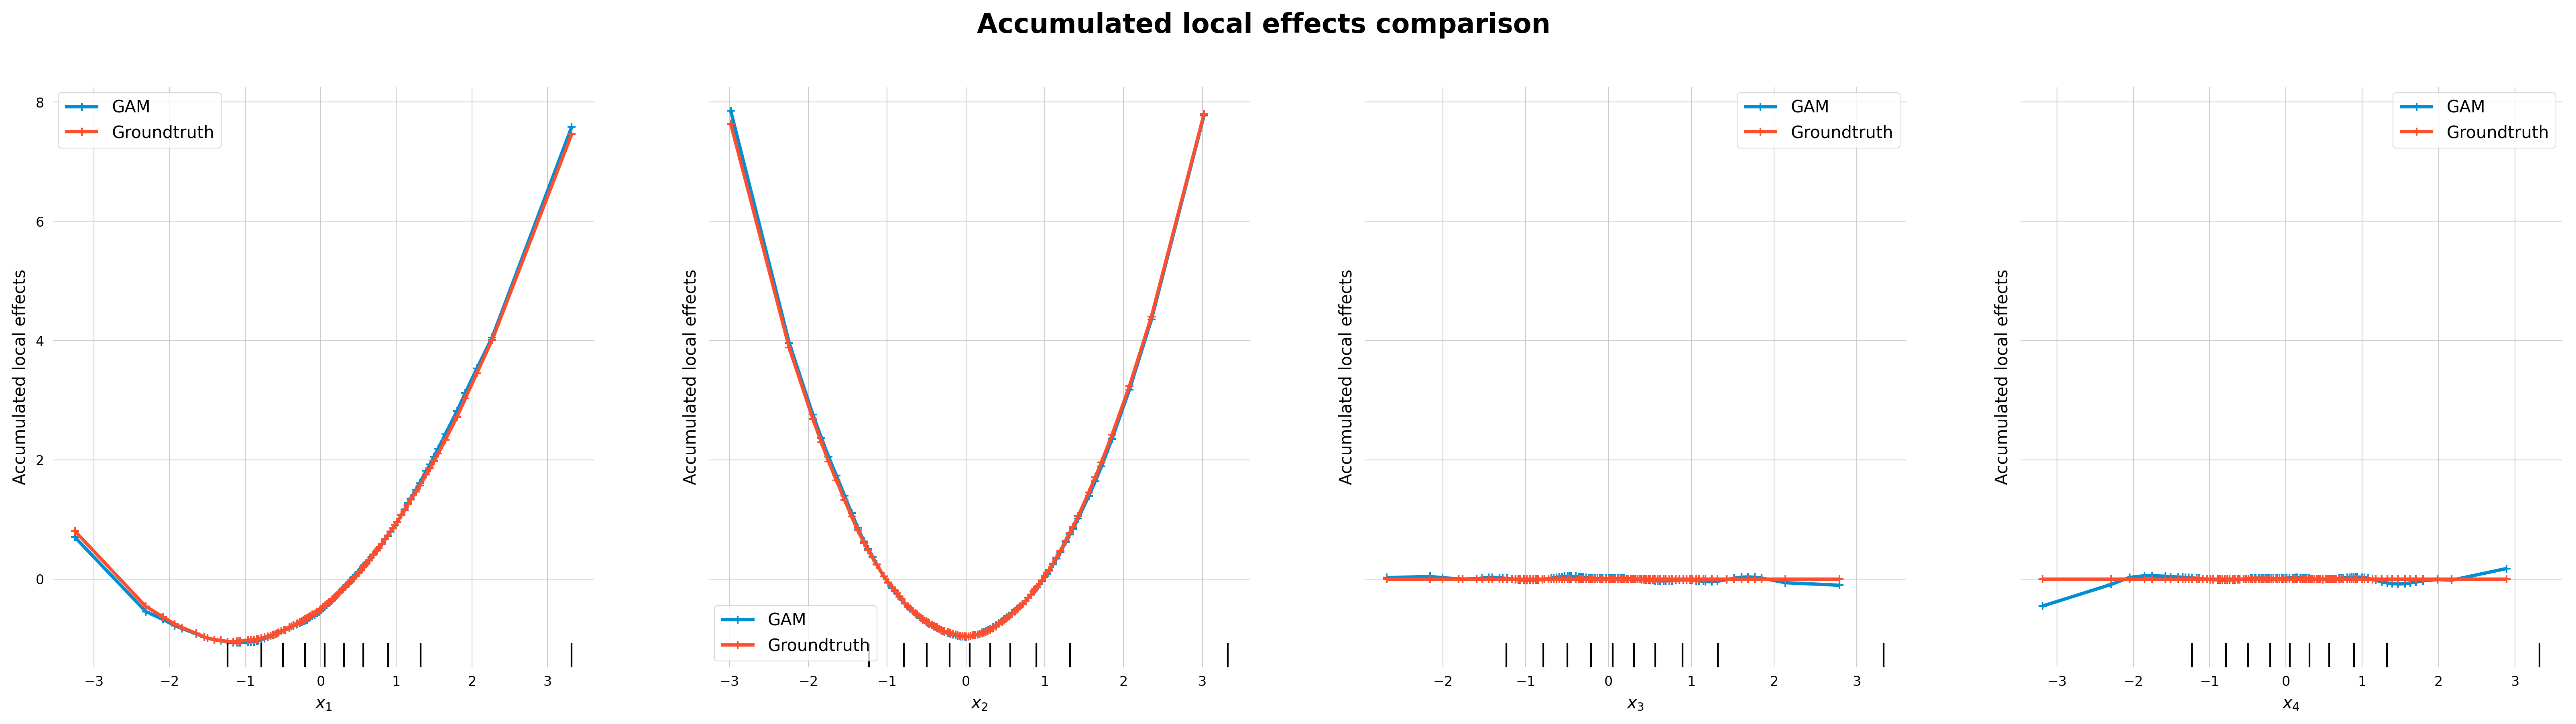

In [22]:
%matplotlib inline
plot_effect_comparison(gam_full, groundtruth, X_train, effect="ALE", groundtruth_feature_effect=groundtruth_effect, features=['x_1', "x_2", "x_3", "x_4"], config=config);

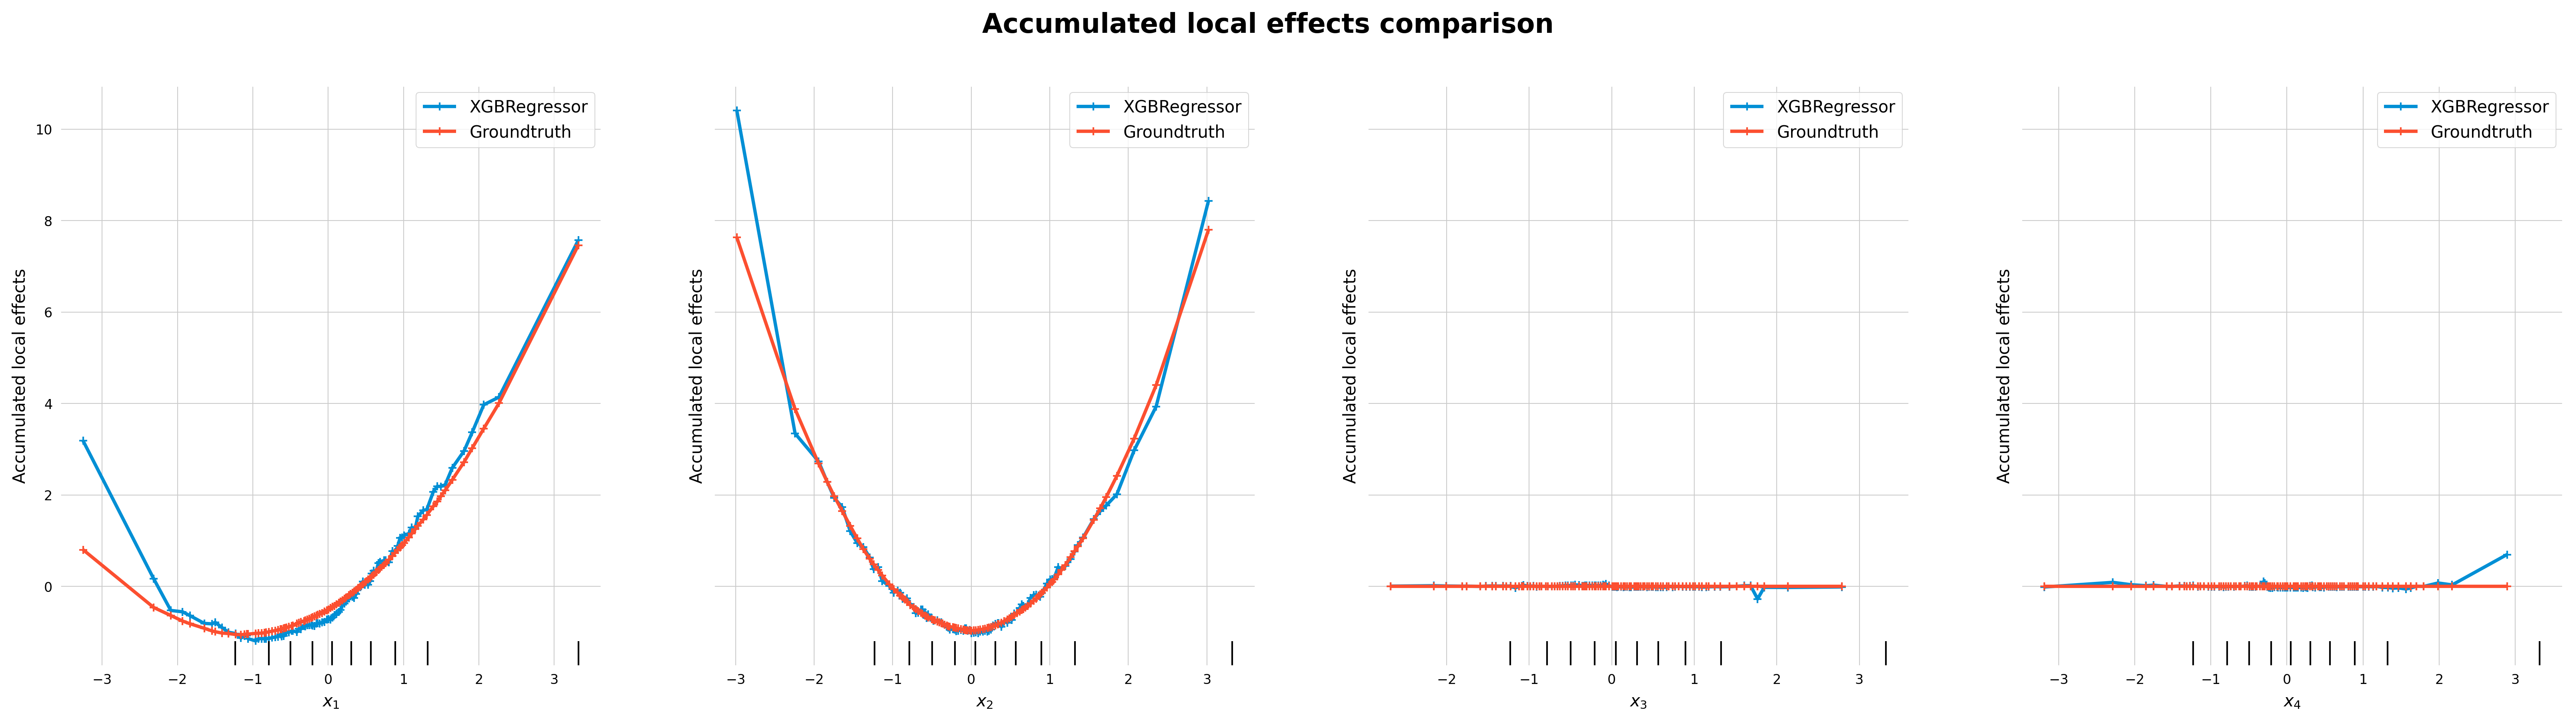

In [23]:
%matplotlib inline
plot_effect_comparison(xgb_cor, groundtruth, X_train, effect="ALE", groundtruth_feature_effect=groundtruth_effect, features=['x_1', "x_2", "x_3", "x_4"], config=config);

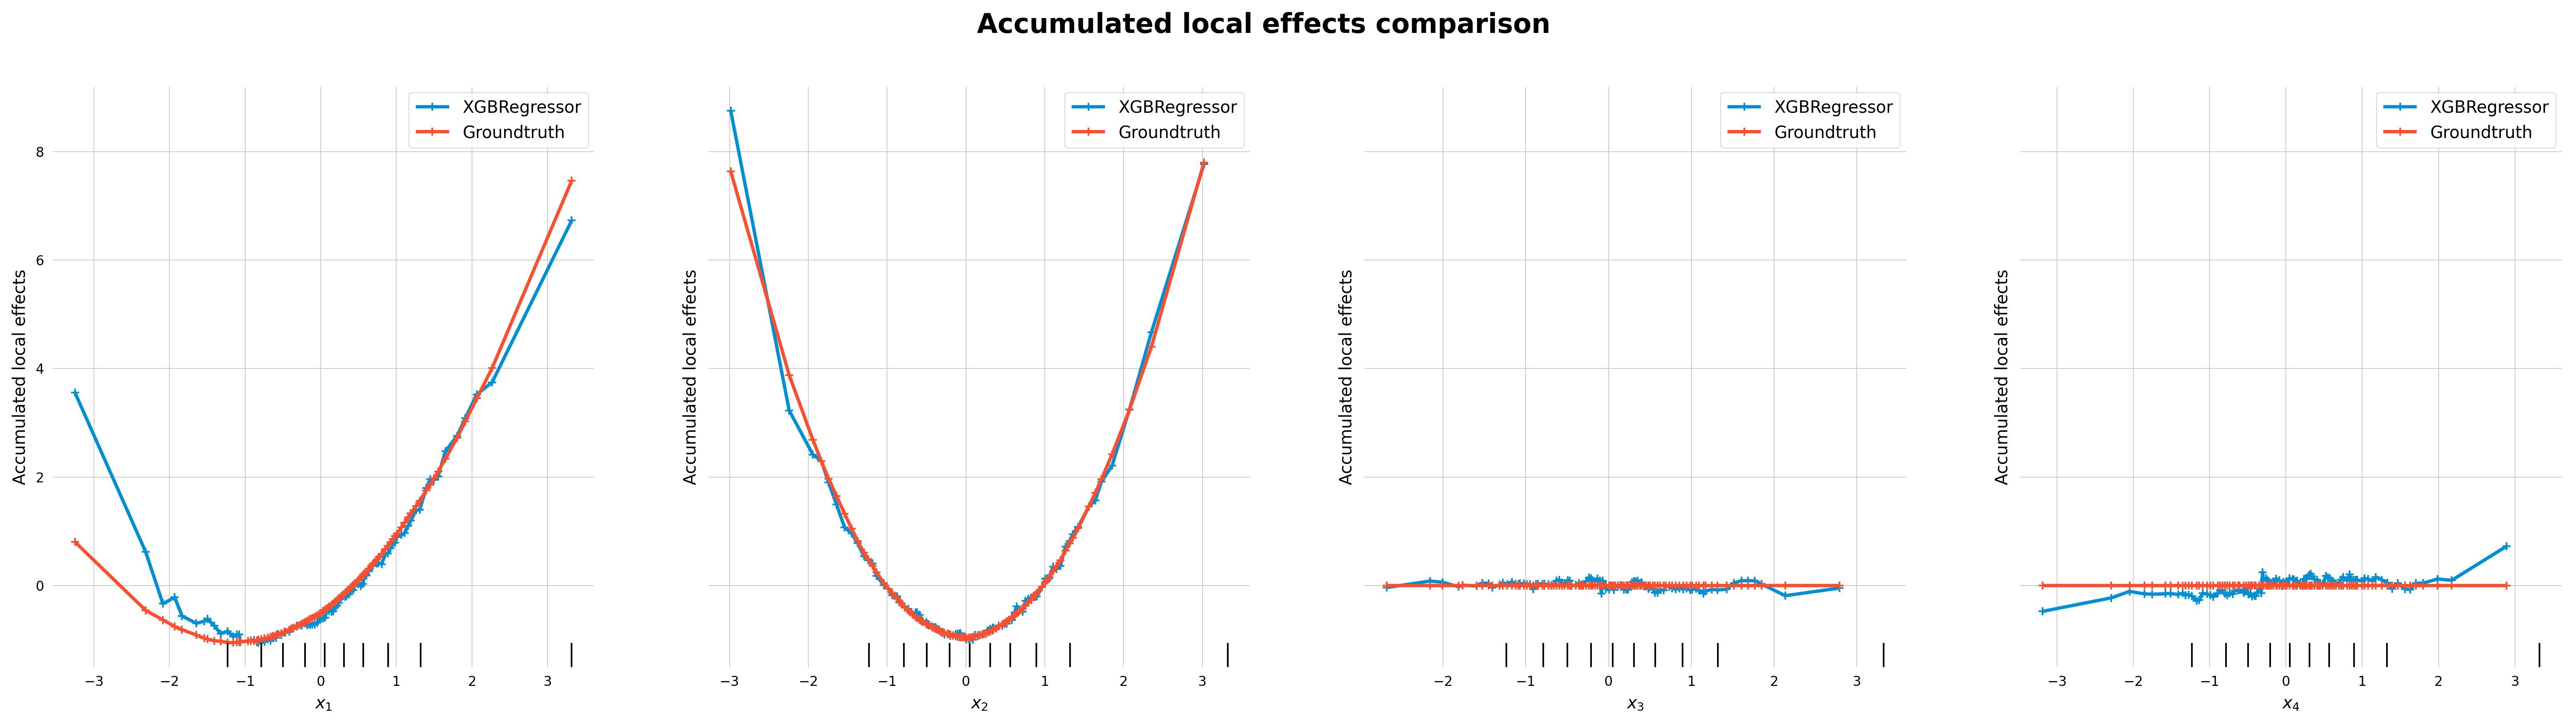

In [24]:
%matplotlib inline
plot_effect_comparison(xgb_full, groundtruth, X_train, effect="ALE", groundtruth_feature_effect=groundtruth_effect, features=['x_1', "x_2", "x_3", "x_4"], config=config);

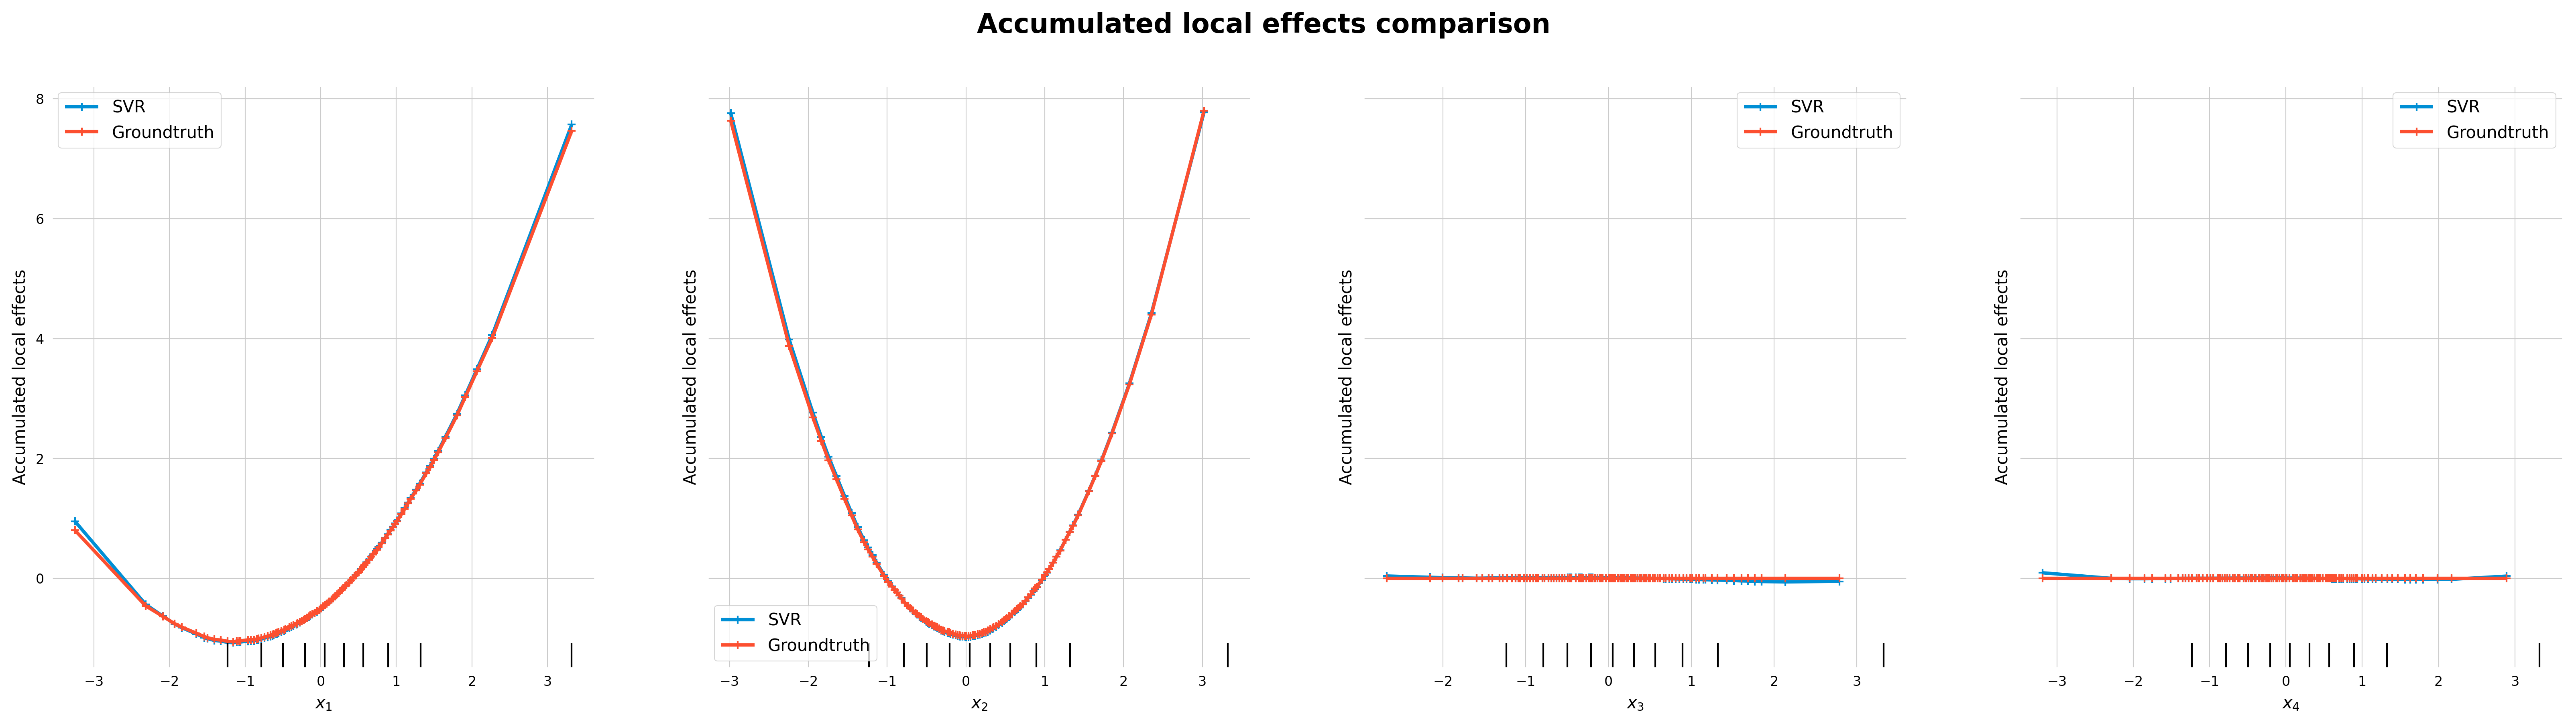

In [25]:
%matplotlib inline
plot_effect_comparison(svm, groundtruth, X_train, effect="ALE", groundtruth_feature_effect=groundtruth_effect, features=['x_1', "x_2", "x_3", "x_4"], config=config);